# Dataset download FOLDER

In [1]:
import pandas as pd
from tqdm import tqdm
import time
import urllib.request


dft = pd.read_csv('faceexp-comparison-data-train-public.csv', sep=',', header=None)
dfv = pd.read_csv('faceexp-comparison-data-test-public.csv', sep=',', header=None)

In [2]:
dft1 = dft[0].drop_duplicates()
dft2 = dft[5].drop_duplicates()
dft3 = dft[10].drop_duplicates()
dftmc = pd.concat([dft1, dft2, dft3], axis=0)
dftm = dftmc.drop_duplicates()

dfv1 = dfv[0].drop_duplicates()
dfv2 = dfv[5].drop_duplicates()
dfv3 = dfv[10].drop_duplicates()
dfvmc = pd.concat([dft1, dft2, dft3], axis=0)
dfvm = dfvmc.drop_duplicates()


df= pd.concat([dftm, dfvm], axis=0)

In [3]:
start = time.time() #took 7.05 hrs
i = 1
for lnk in tqdm(df):
    try:
        urllib.request.urlretrieve(lnk, "DOWN_FILES/"+str(i)+".jpg")
        i = i+1
    except:
        continue
end = time.time()
print("Total Time: {}".format(round(end-start, 1)))
# TIME TAKEN 7.05 hrs

100%|██████████| 162520/162520 [7:03:13<00:00,  6.40it/s]   

Total Time: 25394.0


# Extracting face 

100%|██████████| 151185/151185 [8:45:16<00:00,  4.80it/s]  


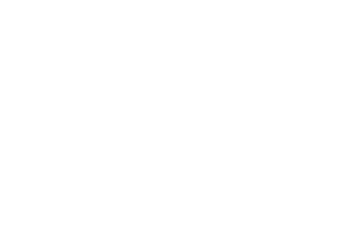

In [1]:
dir = "./DOWN_FILES/"
import glob
from tqdm import tqdm
import cv2
from facenet_pytorch import MTCNN
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch
eye_cascade = cv2.CascadeClassifier(f"{cv2.data.haarcascades}haarcascade_eye.xml")
mouth_cascade = cv2.CascadeClassifier(f"haarcascade_mcs_mouth.xml")
img_file = []
i = 1
for file in tqdm(os.listdir(dir)):
    mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device='cuda:0')
    img = Image.open("./DOWN_FILES/"+file)
    try:
        faces = mtcnn(img)
        try:
            for face in faces:
                laplacian_var = cv2.Laplacian((face.permute(1, 2, 0).int().numpy()).astype(np.uint8), cv2.CV_64F).var()
                if laplacian_var < 9:
                    continue
                else:
                    detected_eye = eye_cascade.detectMultiScale((face.permute(1, 2, 0).int().numpy()).astype(np.uint8))
                    if len(detected_eye) != 0:
                        detected_mouth = mouth_cascade.detectMultiScale((face.permute(1, 2, 0).int().numpy()).astype(np.uint8))
                        if len(detected_mouth) != 0:
                            plt.axis('off')
                            plt.imsave('./JUST_FACE_EXTRACTED/'+str(i)+'.png',(face.permute(1, 2, 0).int().numpy()).astype(np.uint8))
                            i = i + 1
                        else:
                            continue
                    else:
                        continue
        except:
            continue
    except:
        continue
# TIME TAKEN 8:45 hrs

# Refine Dataset

In [ ]:
dir = "./DOWN_FILES/"
import glob
import shutil
from tqdm import tqdm
import cv2
from facenet_pytorch import MTCNN
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch
eye_cascade = cv2.CascadeClassifier(f"{cv2.data.haarcascades}haarcascade_eye.xml")
mouth_cascade = cv2.CascadeClassifier(f"haarcascade_mcs_mouth.xml")
img_file = []
i = 1
for file in tqdm(os.listdir(dir)):
    #img = Image.open("./DOWN_FILES/"+file)
    img = cv2.imread("./DOWN_FILES/"+file)
    name, _= os.path.splitext(file)
    try:
        detected_eye = eye_cascade.detectMultiScale(img)
        if len(detected_eye) != 0:
            detected_mouth = mouth_cascade.detectMultiScale(img)
            if len(detected_mouth) != 0:
                plt.axis('off')
                shutil.copy("./DOWN_FILES/"+file, "./JUST_FACE_EXTRACTED/"+file)
                i = i + 1
            else:
                continue
        else:
            continue
    except:
        continue